# Performance of various Machine Learning Algorithms on Electrical Impedance Tomography Images

## Copyright (c) 2018, Faststream Technologies

## Author: Sudhanva Narayana

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

CURR_DIR = os.path.dirname(os.path.abspath('__file__'))
PARENT_DIR = os.path.abspath(os.path.join(CURR_DIR, os.pardir))

df = pd.read_csv(PARENT_DIR + '\\assets\\datasets\\eit_data.csv', index_col=[0], header = [0], skiprows= [1] ,skipinitialspace=True)

X = df.loc[:, ['gray', 'violet', 'blue', 'green', 'yellow', 'orange', 'red', 'brown']].values.astype(float)
y = df.loc[:, ['target']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_train = y_train.ravel()

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Classifiers

In [2]:
classifiers = {}

### KNN 

In [3]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['knn'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.936


### Decision Tree 

In [4]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['desicion_tree'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

1.0


### Kernal SVM 

In [5]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['kernal_svm'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.928


### Logistic Regression 

In [6]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['logistic_regression'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.88


### Naive Bayes 

In [7]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['naive_bayes'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.72


### Random Forest 

In [8]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['random_forest'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

1.0


### Support Vector Machines 

In [9]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['svm'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.872


In [10]:
print(classifiers)

{'knn': 0.936, 'desicion_tree': 1.0, 'kernal_svm': 0.928, 'logistic_regression': 0.88, 'naive_bayes': 0.72, 'random_forest': 1.0, 'svm': 0.872}


In [11]:
values = list(classifiers.values())
labels = list(classifiers.keys())

values =  [round(i * 100, 2) for i in values]
# print(values)
# print(labels)

index = np.arange(len(labels))

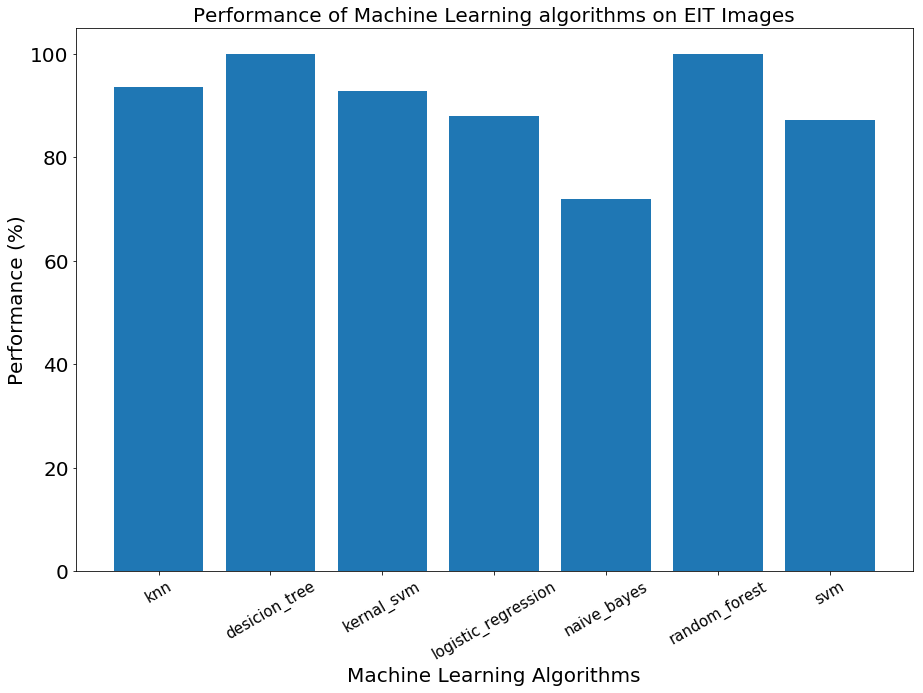

In [12]:
plt.figure(figsize=(15,10))
plt.bar(index, values)
plt.xlabel('Machine Learning Algorithms', fontsize=20)
plt.ylabel('Performance (%)', fontsize=20)
plt.xticks(index, labels, rotation=30, fontsize=15)
plt.yticks(fontsize=20)
plt.title('Performance of Machine Learning algorithms on EIT Images', fontsize=20)
plt.show()

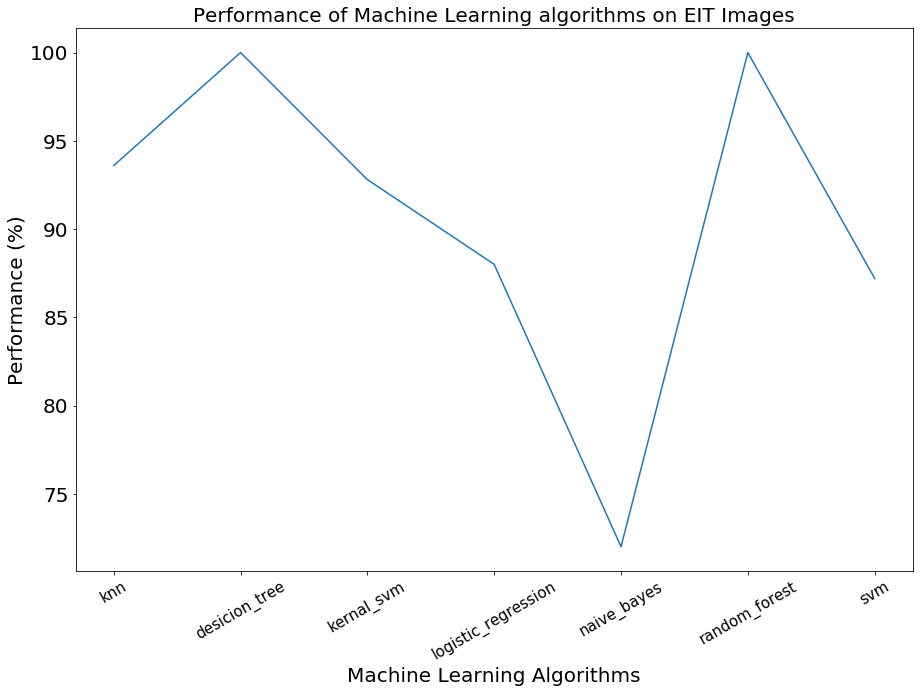

In [13]:
plt.figure(figsize=(15,10))
plt.plot(index, values)
plt.xlabel('Machine Learning Algorithms', fontsize=20)
plt.ylabel('Performance (%)', fontsize=20)
plt.xticks(index, labels, rotation=30, fontsize=15)
plt.yticks(fontsize=20)
plt.title('Performance of Machine Learning algorithms on EIT Images', fontsize=20)
plt.show()